<a href="https://colab.research.google.com/github/devinandana01/DeviProject/blob/main/Devi_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xgboost

In [2]:
!pip install imbalanced-learn

## IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from numpy import argmax
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import random
import pandas as pd

from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from collections import Counter

## IMPORTING DATASET

In [3]:
df=pd.read_csv("transactions_df.csv")
df

,TRANSACTION_ID,TX_DATETIME,ACCOUNT_ID,TRANSACTION_TYPE,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_AMOUNT_STD,TX_AMOUNT_MEAN,Amount_Deviation,Amount_Threshold,Time_Seconds_Diff,Time_Diff,TX_DURING_WEEKEND,TX_DURING_NIGHT,TX_FRAUD_1H_SCENARIO,ACCOUNT_ID_NB_TX_1H_WINDOW,ACCOUNT_ID_AVG_AMOUNT_1H_WINDOW
0,206,2023-04-01 02:03:24,1317,2,109726.21,7404,0,0,0,32384.484105,70990.724352,38735.485648,64768.968210,3278.0,3278.0,1,1,0,1.0,109726.21
1,210,2023-04-01 02:04:08,3131,3,47654.69,7448,0,0,0,14959.301807,32777.196782,14877.493218,29918.603613,1301.0,1301.0,1,1,0,1.0,47654.69
2,248,2023-04-01 02:19:19,746,2,48435.54,8359,0,0,0,19392.377010,40481.627412,7953.912588,38784.754021,6741.0,6741.0,1,1,0,1.0,48435.54
3,253,2023-04-01 02:21:08,3166,3,154065.84,8468,0,1,3,34707.819695,77200.845531,76864.994469,69415.639390,3516.0,3516.0,1,1,0,1.0,154065.84
4,269,2023-04-01 02:26:53,1432,2,53070.56,8813,0,0,0,18953.101452,41070.573515,11999.986485,37906.202903,1378.0,1378.0,1,1,0,1.0,53070.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755279,1760271,2023-09-30 23:58:19,4410,2,30797.10,15811099,182,0,0,24051.767660,50687.985324,-19890.885324,48103.535321,379700.0,379700.0,1,0,0,1.0,30797.10
1755280,1760272,2023-09-30 23:58:19,3681,2,23038.62,15811099,182,0,0,7136.890898,15888.629716,7149.990284,14273.781796,40692.0,40692.0,1,0,0,1.0,23038.62
1755281,1760273,2023-09-30 23:58:25,4657,1,68670.52,15811105,182,0,0,37607.193608,84875.116104,-16204.596104,75214.387216,34529.0,34529.0,1,0,0,1.0,68670.52
1755282,1760274,2023-09-30 23:58:34,4314,3,48549.57,15811114,182,0,0,35291.315650,75321.073282,-26771.503282,70582.631301,29642.0,29642.0,1,0,0,1.0,48549.57


## PRINTING COLUMNS

In [4]:
df.columns

Index(['TRANSACTION_ID', 'TX_DATETIME', 'ACCOUNT_ID', 'TRANSACTION_TYPE',
       'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS', 'TX_FRAUD',
       'TX_FRAUD_SCENARIO', 'TX_AMOUNT_STD', 'TX_AMOUNT_MEAN',
       'Amount_Deviation', 'Amount_Threshold', 'Time_Seconds_Diff',
       'Time_Diff', 'TX_DURING_WEEKEND', 'TX_DURING_NIGHT',
       'TX_FRAUD_1H_SCENARIO', 'ACCOUNT_ID_NB_TX_1H_WINDOW',
       'ACCOUNT_ID_AVG_AMOUNT_1H_WINDOW'],
      dtype='object')

## VISUALISING LABEL COUNT

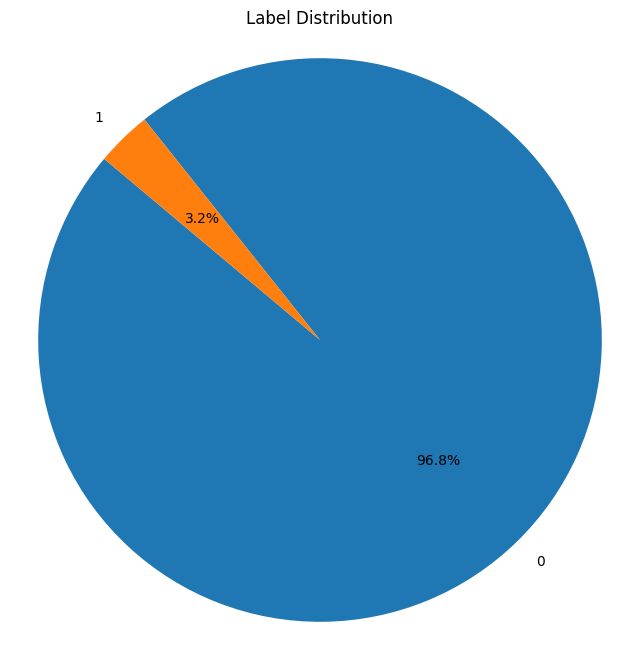

In [5]:
# Count the occurrences of each label
label_counts = df['TX_FRAUD'].value_counts()
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Label Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

##ASSIGNING VALUES FOR DATA AND TARGET


In [6]:
x=df.drop(columns=['TRANSACTION_ID','TX_DATETIME', 'ACCOUNT_ID','TX_FRAUD','TX_FRAUD_SCENARIO'])
y=df['TX_FRAUD']

In [7]:
x

,TRANSACTION_TYPE,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_AMOUNT_STD,TX_AMOUNT_MEAN,Amount_Deviation,Amount_Threshold,Time_Seconds_Diff,Time_Diff,TX_DURING_WEEKEND,TX_DURING_NIGHT,TX_FRAUD_1H_SCENARIO,ACCOUNT_ID_NB_TX_1H_WINDOW,ACCOUNT_ID_AVG_AMOUNT_1H_WINDOW
0,2,109726.21,7404,0,32384.484105,70990.724352,38735.485648,64768.968210,3278.0,3278.0,1,1,0,1.0,109726.21
1,3,47654.69,7448,0,14959.301807,32777.196782,14877.493218,29918.603613,1301.0,1301.0,1,1,0,1.0,47654.69
2,2,48435.54,8359,0,19392.377010,40481.627412,7953.912588,38784.754021,6741.0,6741.0,1,1,0,1.0,48435.54
3,3,154065.84,8468,0,34707.819695,77200.845531,76864.994469,69415.639390,3516.0,3516.0,1,1,0,1.0,154065.84
4,2,53070.56,8813,0,18953.101452,41070.573515,11999.986485,37906.202903,1378.0,1378.0,1,1,0,1.0,53070.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755279,2,30797.10,15811099,182,24051.767660,50687.985324,-19890.885324,48103.535321,379700.0,379700.0,1,0,0,1.0,30797.10
1755280,2,23038.62,15811099,182,7136.890898,15888.629716,7149.990284,14273.781796,40692.0,40692.0,1,0,0,1.0,23038.62
1755281,1,68670.52,15811105,182,37607.193608,84875.116104,-16204.596104,75214.387216,34529.0,34529.0,1,0,0,1.0,68670.52
1755282,3,48549.57,15811114,182,35291.315650,75321.073282,-26771.503282,70582.631301,29642.0,29642.0,1,0,0,1.0,48549.57


In [8]:
y

,TX_FRAUD
0,0
1,0
2,0
3,1
4,0
...,...
1755279,0
1755280,0
1755281,0
1755282,0


## EDA

In [9]:
# 1. Display the first few rows
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,TRANSACTION_ID,TX_DATETIME,ACCOUNT_ID,TRANSACTION_TYPE,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_AMOUNT_STD,TX_AMOUNT_MEAN,Amount_Deviation,Amount_Threshold,Time_Seconds_Diff,Time_Diff,TX_DURING_WEEKEND,TX_DURING_NIGHT,TX_FRAUD_1H_SCENARIO,ACCOUNT_ID_NB_TX_1H_WINDOW,ACCOUNT_ID_AVG_AMOUNT_1H_WINDOW
0,206,2023-04-01 02:03:24,1317,2,109726.21,7404,0,0,0,32384.484105,70990.724352,38735.485648,64768.968210,3278.0,3278.0,1,1,0,1.0,109726.21
1,210,2023-04-01 02:04:08,3131,3,47654.69,7448,0,0,0,14959.301807,32777.196782,14877.493218,29918.603613,1301.0,1301.0,1,1,0,1.0,47654.69
2,248,2023-04-01 02:19:19,746,2,48435.54,8359,0,0,0,19392.377010,40481.627412,7953.912588,38784.754021,6741.0,6741.0,1,1,0,1.0,48435.54
3,253,2023-04-01 02:21:08,3166,3,154065.84,8468,0,1,3,34707.819695,77200.845531,76864.994469,69415.639390,3516.0,3516.0,1,1,0,1.0,154065.84
4,269,2023-04-01 02:26:53,1432,2,53070.56,8813,0,0,0,18953.101452,41070.573515,11999.986485,37906.202903,1378.0,1378.0,1,1,0,1.0,53070.56


In [10]:
# 2. Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
TRANSACTION_ID                     0
TX_DATETIME                        0
ACCOUNT_ID                         0
TRANSACTION_TYPE                   0
TX_AMOUNT                          0
TX_TIME_SECONDS                    0
TX_TIME_DAYS                       0
TX_FRAUD                           0
TX_FRAUD_SCENARIO                  0
TX_AMOUNT_STD                      0
TX_AMOUNT_MEAN                     0
Amount_Deviation                   0
Amount_Threshold                   0
Time_Seconds_Diff                  0
Time_Diff                          0
TX_DURING_WEEKEND                  0
TX_DURING_NIGHT                    0
TX_FRAUD_1H_SCENARIO               0
ACCOUNT_ID_NB_TX_1H_WINDOW         0
ACCOUNT_ID_AVG_AMOUNT_1H_WINDOW    0
dtype: int64


In [11]:
# 3. Basic statistical summary of numerical columns
print("\nStatistical summary of numerical columns:")
print(df.describe())


Statistical summary of numerical columns:
       TRANSACTION_ID    ACCOUNT_ID  TRANSACTION_TYPE     TX_AMOUNT  \
count    1.755284e+06  1.755284e+06      1.755284e+06  1.755284e+06   
mean     8.825946e+05  2.499581e+03      2.000665e+00  5.340778e+04   
std      5.067634e+05  1.448275e+03      8.176483e-01  3.961616e+04   
min      2.060000e+02  0.000000e+00      1.000000e+00  6.400000e-01   
25%      4.437798e+05  1.235000e+03      1.000000e+00  2.144230e+04   
50%      8.826295e+05  2.497000e+03      2.000000e+00  4.478921e+04   
75%      1.321454e+06  3.755000e+03      3.000000e+00  7.705512e+04   
max      1.760275e+06  4.999000e+03      4.000000e+00  3.077322e+05   

       TX_TIME_SECONDS  TX_TIME_DAYS      TX_FRAUD  TX_FRAUD_SCENARIO  \
count     1.755284e+06  1.755284e+06  1.755284e+06       1.755284e+06   
mean      7.926386e+06  9.124064e+01  3.184271e-02       1.101115e-01   
std       4.551363e+06  5.267772e+01  1.755812e-01       6.352929e-01   
min       7.404000e+03  0

In [12]:
# 4. Distribution of transaction types
print("\nTransaction type counts:")
print(df['TRANSACTION_TYPE'].value_counts())


Transaction type counts:
TRANSACTION_TYPE
1    585165
2    584785
3    584336
4       998
Name: count, dtype: int64


In [13]:
# 5. Distribution of fraud vs. non-fraud transactions
print("\nFraud vs. Non-fraud transactions:")
print(df['TX_FRAUD'].value_counts())


Fraud vs. Non-fraud transactions:
TX_FRAUD
0    1699391
1      55893
Name: count, dtype: int64
